## Observations and Insights 

In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset with a join on Mouse ID
mouse_study_joined_results_df = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID",how="left")


# Display the data table for preview
mouse_study_joined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

unique_mice = len(mouse_study_joined_results_df["Mouse ID"].unique())
unique_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice_ID = mouse_study_joined_results_df.loc[mouse_study_joined_results_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

Duped_mouse_study_df = mouse_study_joined_results_df[mouse_study_joined_results_df['Mouse ID'] == 'g989']
Duped_mouse_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_study_df = mouse_study_joined_results_df[mouse_study_joined_results_df['Mouse ID'] != 'g989']
cleaned_mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

unique_mice2 = len(cleaned_mouse_study_df["Mouse ID"].unique())
unique_mice2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_mean = cleaned_mouse_study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = cleaned_mouse_study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_var = cleaned_mouse_study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = cleaned_mouse_study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = cleaned_mouse_study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({'Tumor Mean': tumor_mean, 
                           'Tumor Median':tumor_median, 
                           'Variance': tumor_var,
                          'Standard Deviation': tumor_std,
                          'SEM': tumor_sem})
summary_df


,Tumor Mean,Tumor Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregated_df = cleaned_mouse_study_df.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_aggregated_df.head()

,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

Drug Regimen
Capomulin    [s185, x401, m601, f966, u364, y793, r554, m95...
Ceftamin     [a275, b447, b487, b759, f436, h531, j296, k21...
Infubinol    [a203, a251, a577, a685, c139, c326, c895, e47...
Ketapril     [a457, c580, c819, c832, d474, f278, f932, g10...
Naftisol     [a818, b559, e213, e291, e584, f993, j755, l70...
Placebo      [a262, a897, c282, c757, c766, e227, i477, i66...
Propriva     [a699, c927, g558, g570, i635, k603, l215, n48...
Ramicane     [k403, g791, s508, m546, z578, j913, n364, c75...
Stelasyn     [a366, a492, a963, b879, c402, f234, g867, h33...
Zoniferol    [a401, a788, b313, c264, c302, c559, d133, d16...
Name: Mouse ID, dtype: object


<IPython.core.display.Javascript object>


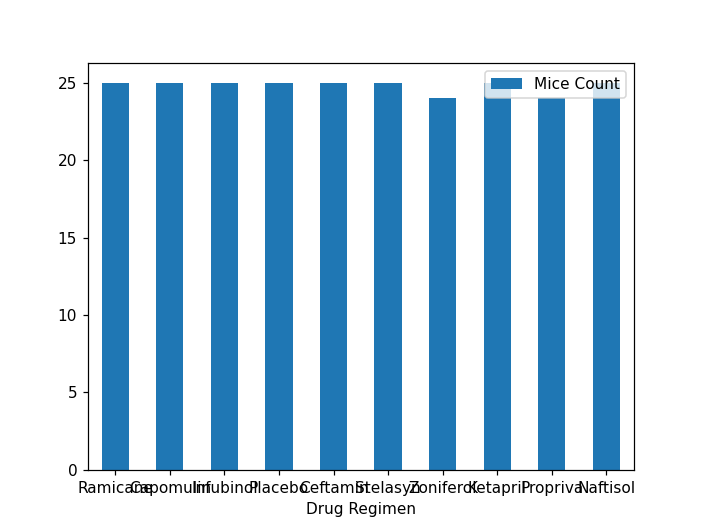

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
y_axis_size = unique_mice2
x_axis_marks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,]

x_axis_labels = cleaned_mouse_study_df['Drug Regimen'].unique()

cleaned_mouse_study_groupby_df = cleaned_mouse_study_df.groupby(['Drug Regimen'])
test = cleaned_mouse_study_groupby_df['Mouse ID'].unique()
print(test)


mice_per_regimen = [len(regimen) for regimen in cleaned_mouse_study_groupby_df["Mouse ID"].unique()]
mice_per_regimen
#bar_graph = pd.DataFrame.plot.bar(x=x_axis_labels, y=mice_per_regimen)
df = pd.DataFrame({'Drug Regimen': x_axis_labels , 'Mice Count':mice_per_regimen})
ax = df.plot.bar(x='Drug Regimen', y='Mice Count', rot=0)

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
